In [ ]:
Shilpa Kolekar
Insurance Policy Renewal Prediction 

In [2]:
#load necessary libraries
#data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# linear algebra
import numpy as np

import yellowbrick
# import visulization packages

import matplotlib.pyplot as plt
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# Import resample
from sklearn.utils import resample

In [ ]:
Load data into a dataframe

In [3]:
# read Insurance.CSV in dataframe insurance_data by pd.read_csv() and view the file
insurance_data = pd.read_csv('Insurance.CSV')
insurance_data

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,48057,0.425,23367,224550,1.0,0.0,0.0,98.70,19,B,Urban,13800,1
79849,59012,0.704,19356,279150,1.0,0.0,1.0,99.42,12,A,Rural,28500,1
79850,77050,0.000,23372,305020,0.0,0.0,0.0,98.89,12,A,Rural,9600,1
79851,67225,0.398,22641,39330,0.0,0.0,0.0,98.68,8,A,Rural,5700,1


In [ ]:
Check the dimension of the table

In [4]:
#check for insurance_data dataframe dimension by applying shape to dataframe
print("The dimension of the Insurance file is: ", insurance_data.shape)

The dimension of the Insurance file is:  (79853, 13)


In [ ]:
Look at the data

In [5]:
#head(n) will give you top n numbers of data from dataframe 
print(insurance_data.head(5))

       id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0  110936                             0.429        12058  355060   
1   41492                             0.010        21546  315150   
2   31300                             0.917        17531   84140   
3   19415                             0.049        15341  250510   
4   99379                             0.052        31400  198680   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    2.0                     3.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.02   
1                             0.0                           99.89   
2                             1.0                           98.69   
3 

In [ ]:
What type of variables are in the table 

In [6]:
#describe and summarize will give you statistical significance and summery of the each variable in dataframe
print("Describe Data")
print(insurance_data.describe())
print("Summarized Data")
print(insurance_data.describe(include=['O']))


Describe Data
                  id  perc_premium_paid_by_cash_credit   age_in_days  \
count   79853.000000                      79853.000000  79853.000000   
mean    57167.166368                          0.314288  18846.696906   
std     32928.970160                          0.334915   5208.719136   
min         2.000000                          0.000000   7670.000000   
25%     28640.000000                          0.034000  14974.000000   
50%     57262.000000                          0.167000  18625.000000   
75%     85632.000000                          0.538000  22636.000000   
max    114076.000000                          1.000000  37602.000000   

             Income  Count_3-6_months_late  Count_6-12_months_late  \
count  7.985300e+04           79756.000000            79756.000000   
mean   2.088472e+05               0.248671                0.078188   
std    4.965826e+05               0.691468                0.436507   
min    2.403000e+04               0.000000               

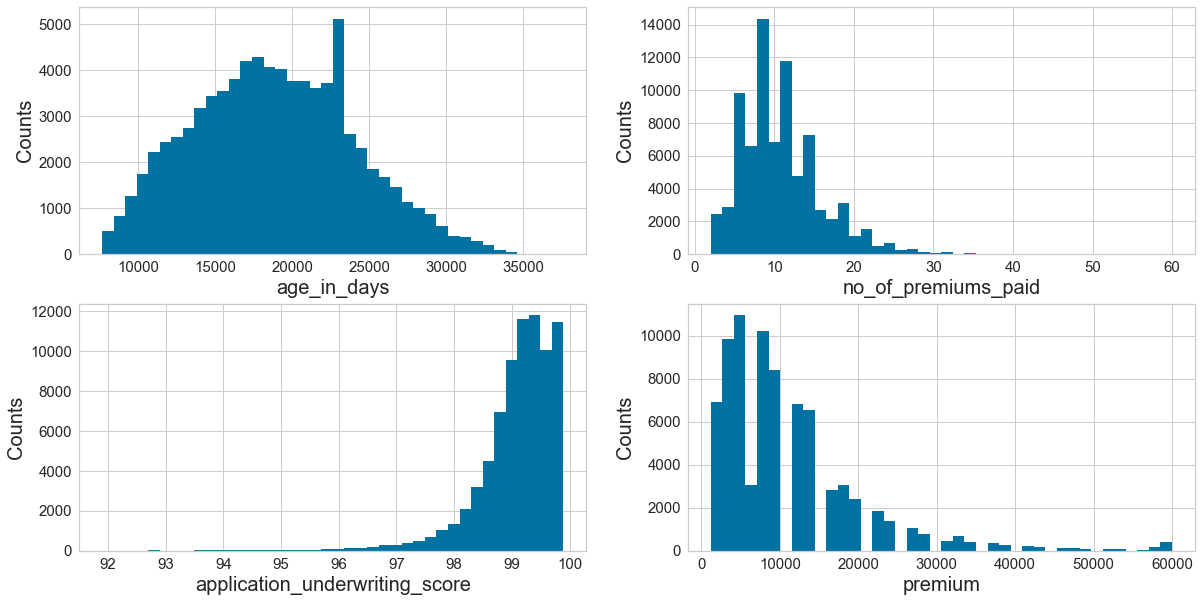

In [7]:
# set up the figure size
#figure(figsize=(1,1)) would create an inch-by-inch image, 
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['age_in_days', 'no_of_premiums_paid', 'application_underwriting_score', 'premium']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histogrms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(insurance_data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

In [ ]:
Above Graphs has four different features from the dataframe and are represented on the histograms. Variable age_in_days has each policyholder's age in days. This variable has spiked at 20,000-24,000 days which shows that there are more policyholders who are between the age of 60-65years. The 2nd graph has no_of_premiums_paid, which indicates how many premiums were paid by the policyholder to the insurer. The 3rd graph has application_underwritting_score, which shows that the majority of policyholders holds 97% and above underwriting score in order to obtain the insurance. The 4th graph has premium paid to insurers by policyholders. as per graph, premiums are high up to 15,000 and there are few high amount payments but premium numbers are low. 

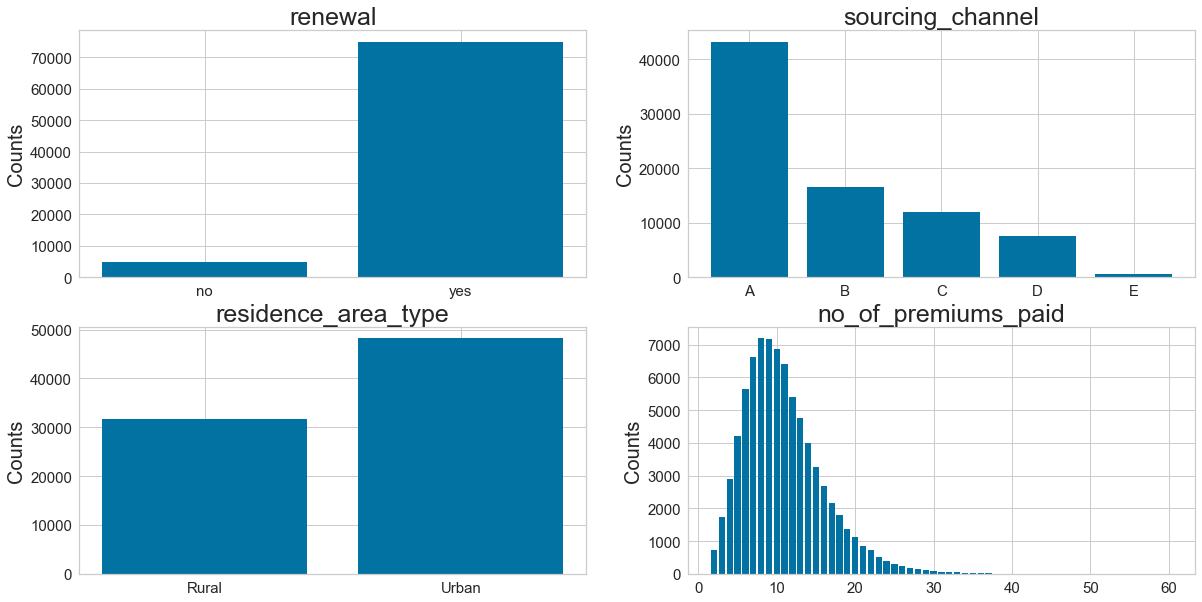

In [8]:
#7:  Barcharts: set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the insurance_data read to feed into the visulizer
X_renewal = insurance_data.replace({'renewal': {1: 'yes', 0: 'no'}}).groupby('renewal').size().reset_index(name='Counts')['renewal']
Y_renewal = insurance_data.replace({'renewal': {1: 'yes', 0: 'no'}}).groupby('renewal').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_renewal, Y_renewal)
axes[0, 0].set_title('renewal', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the insurance_data read to feed into the visulizer
X_sourcing_channel = insurance_data.replace({'sourcing_channel': {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}}).groupby('sourcing_channel').size().reset_index(name='Counts')['sourcing_channel']
Y_sourcing_channel = insurance_data.replace({'sourcing_channel': {1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'}}).groupby('sourcing_channel').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_sourcing_channel, Y_sourcing_channel)
axes[0, 1].set_title('sourcing_channel', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the insurance_data read to feed into the visulizer
X_residence_area_type = insurance_data.groupby('residence_area_type').size().reset_index(name='Counts')['residence_area_type']
Y_residence_area_type = insurance_data.groupby('residence_area_type').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_residence_area_type, Y_residence_area_type)
axes[1, 0].set_title('residence_area_type', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the insurance_data read to feed into the visulizer
X_no_of_premiums_paid = insurance_data.groupby('no_of_premiums_paid').size().reset_index(name='Counts')['no_of_premiums_paid']
Y_no_of_premiums_paid = insurance_data.groupby('no_of_premiums_paid').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_no_of_premiums_paid, Y_no_of_premiums_paid)
axes[1, 1].set_title('no_of_premiums_paid', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
plt.show()


In [ ]:
Above bar charts show classification variables from the dataframe and their analysis. By looking at the 1st renewal graph, we can indicate that the majority of policyholders are ok to renew their policy at the end of the policy period. The 2nd graph has a sourcing_channel and most of the insured are coming from Channel A. The 3rd graph shows that Urban has around 20,000 more insureds than rural. This indicates that insurance companies have more presence in urban areas than rural areas. Area of population is another factor to consider. The 4th graph shows that most of the insureds have paid more than few premiums.

In [ ]:
Pearson Ranking

In [9]:
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = insurance_data[num_features].values


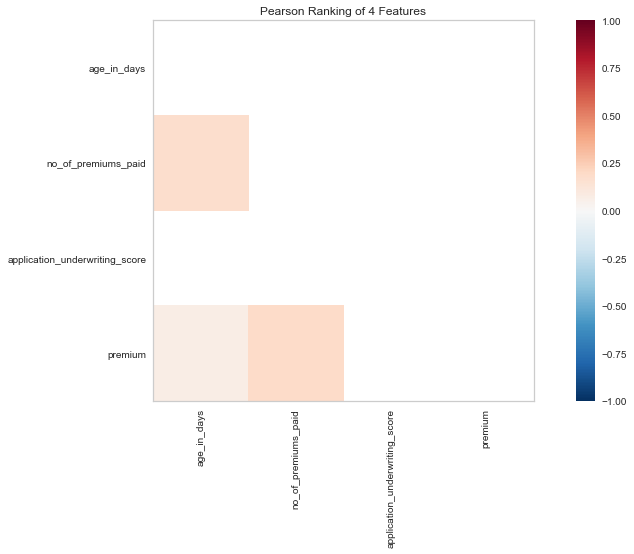

In [10]:
# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="pcoords1.png") # Draw/show/poof the data
plt.show()

In [ ]:
Above graph indicates pearson ranking for ‘age_in_days', 'no_of_premiums_paid', 'application_underwriting_score', and  'premium’. All features have low to medium positive correlation except for ‘application_underwriting_score’ and 'no_of_premiums_paid' which low to medium negative correlation.

In [ ]:
Compare variables against Renewal and No Renewal


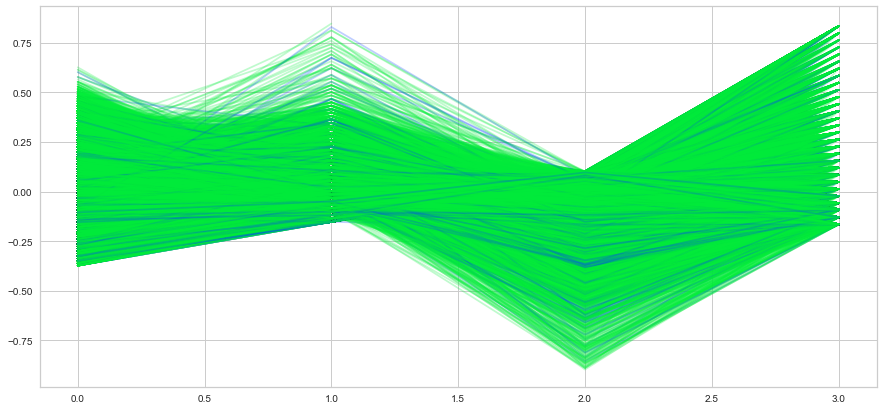

In [11]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['No-renewal', 'Renewal']
num_features = ['age_in_days', 'no_of_premiums_paid', 'application_underwriting_score', 'premium']

# copy data to a new dataframe
data_norm = insurance_data.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (insurance_data[feature] - insurance_data[feature].mean(skipna=True)) / (insurance_data[feature].max(skipna=True) - insurance_data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = insurance_data.renewal.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();

In [ ]:
Due to high number of data points, the parallel coordinates chart is not readable

In [ ]:
Stacked bar charts to compare Renewal/No Renewal

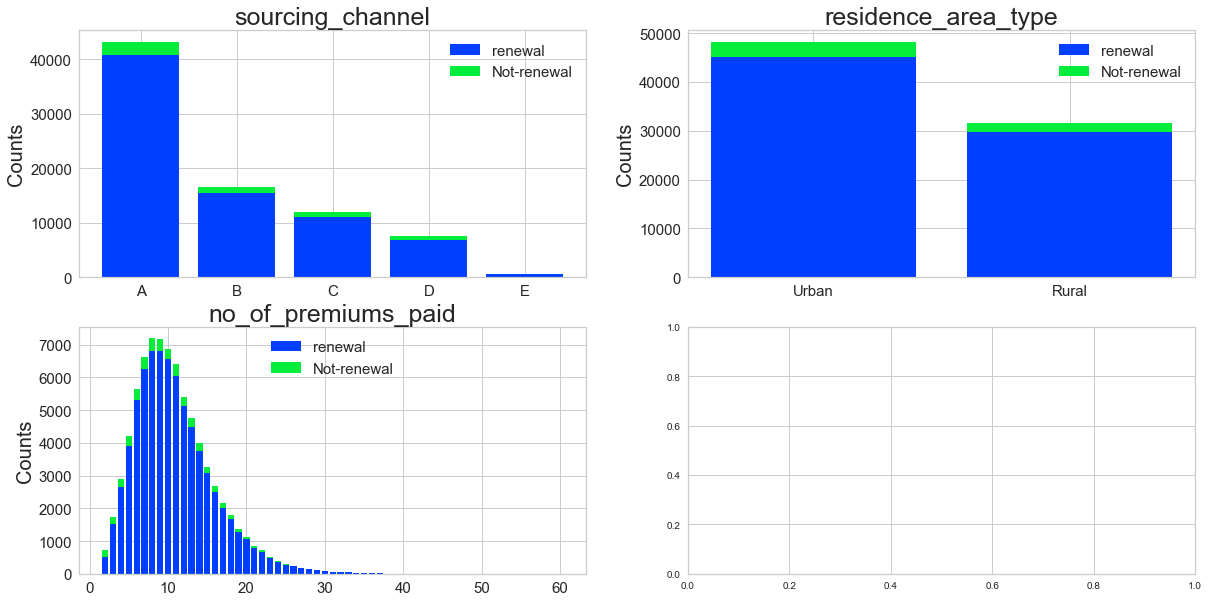

In [12]:
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
sourcing_channel_renewal = insurance_data.replace({'renewal': {1: 'renewal', 0: 'Not-renewal'}})[insurance_data['renewal']==1]['sourcing_channel'].value_counts()
sourcing_channel_not_renewal = insurance_data.replace({'renewal': {1: 'renewal', 0: 'Not-renewal'}})[insurance_data['renewal']==0]['sourcing_channel'].value_counts()
sourcing_channel_not_renewal = sourcing_channel_not_renewal.reindex(index = sourcing_channel_renewal.index)

# make the bar plot
p1 = axes[0, 0].bar(sourcing_channel_renewal.index, sourcing_channel_renewal.values)
p2 = axes[0, 0].bar(sourcing_channel_not_renewal.index, sourcing_channel_not_renewal.values, bottom=sourcing_channel_renewal.values)
axes[0, 0].set_title('sourcing_channel', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('renewal', 'Not-renewal'), fontsize = 15)

# make the data read to feed into the visualizer
residence_area_type_renewal = insurance_data.replace({'renewal': {1: 'renewal', 0: 'Not-renewal'}})[insurance_data['renewal']==1]['residence_area_type'].value_counts()
residence_area_type_not_renewal = insurance_data.replace({'renewal': {1: 'renewal', 0: 'Not-renewal'}})[insurance_data['renewal']==0]['residence_area_type'].value_counts()
residence_area_type_not_renewal = residence_area_type_not_renewal.reindex(index = residence_area_type_renewal.index)

# make the bar plot
p3 = axes[0, 1].bar(residence_area_type_renewal.index, residence_area_type_renewal.values)
p4 = axes[0, 1].bar(residence_area_type_not_renewal.index, residence_area_type_not_renewal.values, bottom=residence_area_type_renewal.values)
axes[0, 1].set_title('residence_area_type', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('renewal', 'Not-renewal'), fontsize = 15)

# make the data read to feed into the visualizer
no_of_premiums_paid_renewal = insurance_data.replace({'renewal': {1: 'renewal', 0: 'Not-renewal'}})[insurance_data['renewal']==1]['no_of_premiums_paid'].value_counts()
no_of_premiums_paid_not_renewal = insurance_data.replace({'renewal': {1: 'renewal', 0: 'Not-renewal'}})[insurance_data['renewal']==0]['no_of_premiums_paid'].value_counts()
no_of_premiums_paid_not_renewal = no_of_premiums_paid_not_renewal.reindex(index = no_of_premiums_paid_renewal.index)

# make the bar plot
p5 = axes[1, 0].bar(no_of_premiums_paid_renewal.index, no_of_premiums_paid_renewal.values)
p6 = axes[1, 0].bar(no_of_premiums_paid_not_renewal.index, no_of_premiums_paid_not_renewal.values, bottom=no_of_premiums_paid_renewal.values)
axes[1, 0].set_title('no_of_premiums_paid', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('renewal', 'Not-renewal'), fontsize = 15)
plt.show()

In [ ]:
The stacked bar charts indicate that the number of renewals are considerably higher than the number of non-renewals for all features.

In [ ]:
Fill in missing values and eliminate features

In [13]:
#fill the missing age data with median value
def fill_na_median(insurance_data, inplace=True):
    return insurance_data.fillna(insurance_data.median(), inplace=inplace)

# fill missing values in application_underwriting_score variable with median value
fill_na_median(insurance_data['application_underwriting_score'])

# check the result
print(insurance_data['application_underwriting_score'].describe())

count    79853.000000
mean        99.072606
std          0.726395
min         91.900000
25%         98.830000
50%         99.210000
75%         99.520000
max         99.890000
Name: application_underwriting_score, dtype: float64


In [14]:
# Check the most represented value in 'count' variables
print(insurance_data['Count_3-6_months_late'].describe())
print(insurance_data['Count_6-12_months_late'].describe())
print(insurance_data['Count_more_than_12_months_late'].describe())

count    79756.000000
mean         0.248671
std          0.691468
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: Count_3-6_months_late, dtype: float64
count    79756.000000
mean         0.078188
std          0.436507
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: Count_6-12_months_late, dtype: float64
count    79756.000000
mean         0.060008
std          0.312023
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: Count_more_than_12_months_late, dtype: float64


In [15]:
# fill with the most represented value (0.0) for 'count' variables
def fill_na_most(data, inplace=True):
    return data.fillna(0.0, inplace=inplace)

# Fill missing values for 'count' variables using fill_na_most function
fill_na_most(insurance_data['Count_3-6_months_late'])
fill_na_most(insurance_data['Count_6-12_months_late'])
fill_na_most(insurance_data['Count_more_than_12_months_late'])

In [16]:
# Check if there are any other variables with missing values
insurance_data.isna().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
dtype: int64

In [17]:
# Feature extraction - combine three late count features into one feature
insurance_data['count_late'] = insurance_data['Count_3-6_months_late'] + insurance_data['Count_6-12_months_late'] + insurance_data['Count_more_than_12_months_late']

In [18]:
# Convert age in days to age in years 
insurance_data['age_in_years'] = (insurance_data['age_in_days'] / 365).astype(int)

In [19]:
# Check the data frame for newly added and updated columns
insurance_data.head(5)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,count_late,age_in_years
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1,0.0,33
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1,0.0,59
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0,6.0,48
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1,0.0,42
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1,0.0,86


In [20]:
# Remove features that are not needed
del insurance_data['id']
del insurance_data['perc_premium_paid_by_cash_credit']
del insurance_data['Count_3-6_months_late']
del insurance_data['Count_6-12_months_late']
del insurance_data['Count_more_than_12_months_late']

In [21]:
# import package
import numpy as np

# log-transformation
def log_transformation(insurance_data):
    return insurance_data.apply(np.log1p)

# Log transformation of application_underwriting_score feature
insurance_data['application_underwriting_score_log1p'] = log_transformation(insurance_data['application_underwriting_score'])

# check the data
print(insurance_data.describe())

        age_in_days        Income  application_underwriting_score  \
count  79853.000000  7.985300e+04                    79853.000000   
mean   18846.696906  2.088472e+05                       99.072606   
std     5208.719136  4.965826e+05                        0.726395   
min     7670.000000  2.403000e+04                       91.900000   
25%    14974.000000  1.080100e+05                       98.830000   
50%    18625.000000  1.665600e+05                       99.210000   
75%    22636.000000  2.520900e+05                       99.520000   
max    37602.000000  9.026260e+07                       99.890000   

       no_of_premiums_paid       premium       renewal    count_late  \
count         79853.000000  79853.000000  79853.000000  79853.000000   
mean             10.863887  10924.507533      0.937410      0.386398   
std               5.170687   9401.676542      0.242226      1.043299   
min               2.000000   1200.000000      0.000000      0.000000   
25%               

In [ ]:
Adjust skewed data (fare), check the distribution using histogram, set up the figure size


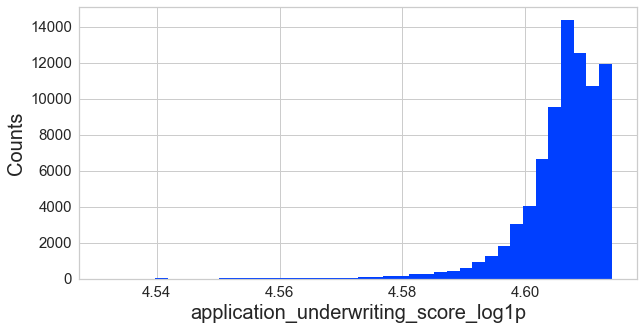

In [22]:
# adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(insurance_data['application_underwriting_score_log1p'], bins=40)
plt.xlabel('application_underwriting_score_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [ ]:
Create a whole features dataset that can be used for train and validation data splitting

In [55]:
# Handle imbalanced data
# Separate majority and minority classes
df_minority = insurance_data[insurance_data.renewal==0]
df_majority = insurance_data[insurance_data.renewal==1]

print(df_minority.shape)
print(df_majority.shape)

(4998, 11)
(74855, 11)


In [56]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4998,   # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.renewal.value_counts()

1    4998
0    4998
Name: renewal, dtype: int64

In [ ]:
Convert categorical data to numbers, get the categorical data

In [57]:
#convert categorical data to numbers
#get the categorical data
cat_features = ['residence_area_type', 'sourcing_channel']
data_cat = df_downsampled[cat_features]
data_cat = data_cat.replace()
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

       residence_area_type_Rural  residence_area_type_Urban  \
62519                          0                          1   
74276                          0                          1   
7117                           1                          0   
63582                          0                          1   
52254                          1                          0   
69868                          0                          1   
42688                          1                          0   
75248                          1                          0   

       sourcing_channel_A  sourcing_channel_B  sourcing_channel_C  \
62519                   0                   1                   0   
74276                   1                   0                   0   
7117                    1                   0                   0   
63582                   0                   0                   0   
52254                   0                   0                   1   
69868             

In [60]:
#here we will combine the numerical features and the dummie features together
features_model = ["age_in_days","Income","application_underwriting_score",
                  "no_of_premiums_paid","premium", "count_late", "age_in_years"]
data_model_X = pd.concat([df_downsampled[features_model], data_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
data_model_y = df_downsampled.renewal

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.2, random_state=15)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Renewal and Not-Renewal
print('\n')
print('No. of renewal and not-renewal in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of renewal and not-renewal in the validation set:')
print(y_val.value_counts())


No. of samples in training set:  7996
No. of samples in validation set: 2000


No. of renewal and not-renewal in the training set:
0    4024
1    3972
Name: renewal, dtype: int64


No. of renewal and not-renewal in the validation set:
1    1026
0     974
Name: renewal, dtype: int64


In [ ]:
Eval Metrics

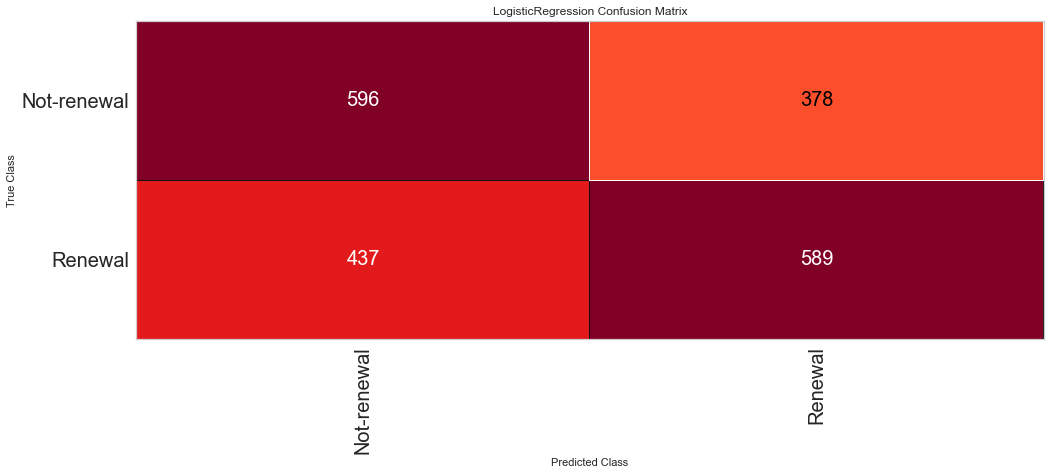

In [61]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not-renewal','Renewal']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()



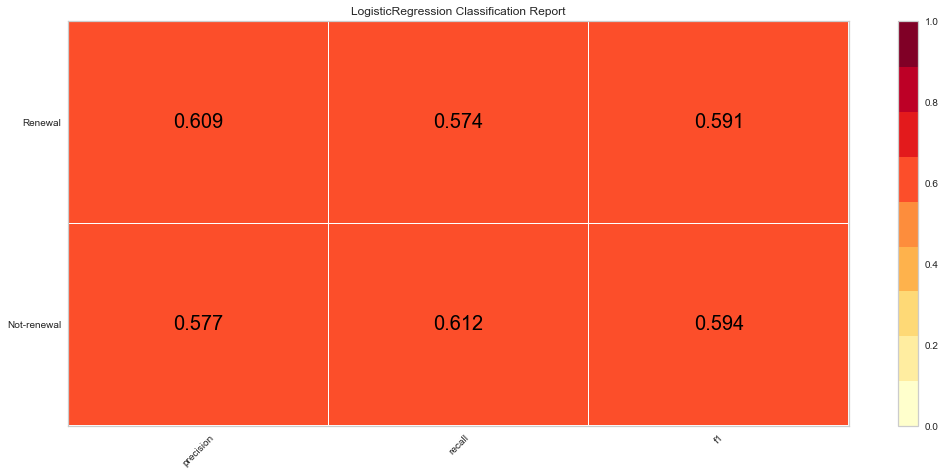

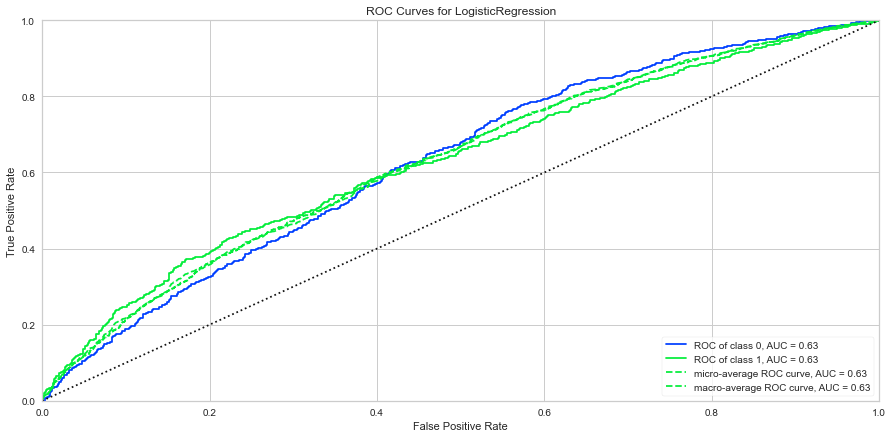

In [62]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


In [63]:
# Create predictions
predictions = model.predict(X_val)

In [64]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.5925


In [ ]:
After cleaning the dataframe in milestone 2, the data frame is ready to split between train and test dataset in milestone 3. Predictor variable in the dataframe is “renewal” which indicates how many customers’ policies can be renewed. In order to use the logistic regression function, I used the predictor variable value of 1 for renewal and 0 for Not-renewal. 

When I plotted the confusion matrix for my model, the model was giving 0 True Positives. I found that the data was highly imbalanced in the dataframe, and before splitting them in train and test data sets, it was necessary to balance the data. I separated the data into majority and minority classes. Further, majority class was downsampled so its count can match with minority class count. The new balanced data set was a combination of an equal number of minority and majority classes. I then changed the hyperparameters manually until the performance of the model improved. The best performance was at 80% train and 20% test data split with random_state=15. 

Metrics I used for logistic regression were confusion matrix, classification report, and ROC curve. This model is acceptable, however further tuning is needed.  


In [65]:
# Logistic Regression Hyperparameter tuning using GridSearchCV

#Import RepeatedStratifiedKFold and GridSearchCV 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [66]:
newmodel = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=newmodel, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.723359 using {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.723359 (0.014535) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.722817 (0.015617) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.579455 (0.057725) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.700516 (0.026297) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10, 'penalty': 'l1', 'solver': 'lbfgs'}
0.723026 (0.015702) with: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
0.722650 (0.015462) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.578497 (0.055691) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.699016 (0.024724) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.000000 (0.000000) with: 

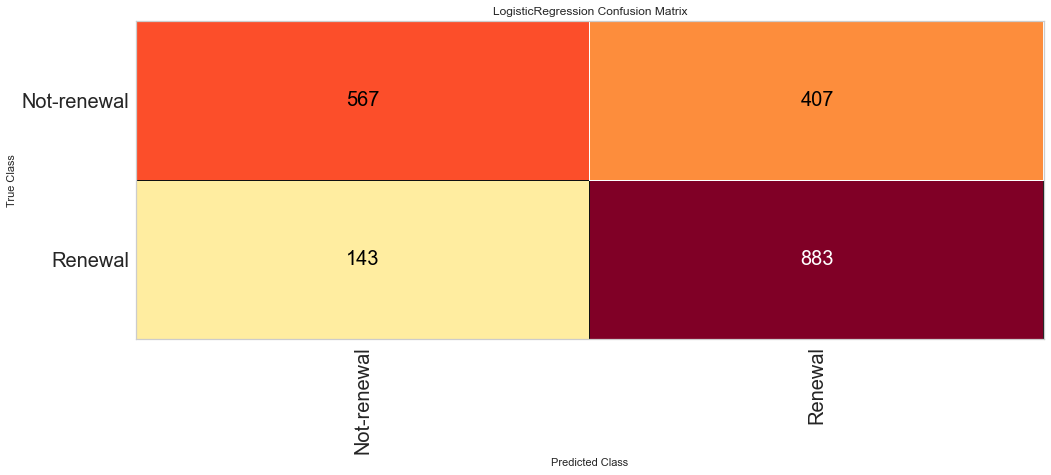

In [67]:
# Instantiate the classification model 
model = LogisticRegression(C=100, penalty='l1', solver='liblinear')

#The ConfusionMatrix visualizer taxes a model
classes = ['Not-renewal','Renewal']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

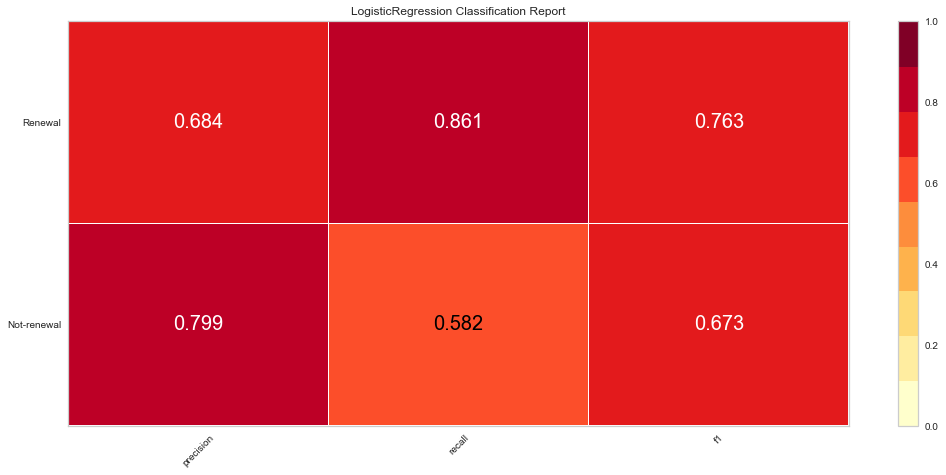

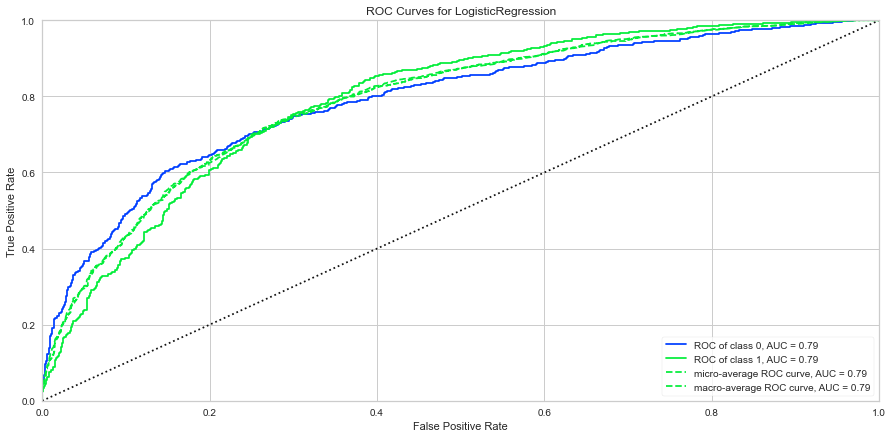

In [68]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [69]:
# Create predictions
predictions = model.predict(X_val)

In [70]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.725


In [ ]:
After hyperparameter tuning and using the best parameters, the accuracy improved from 59.25% to 72.40%.  

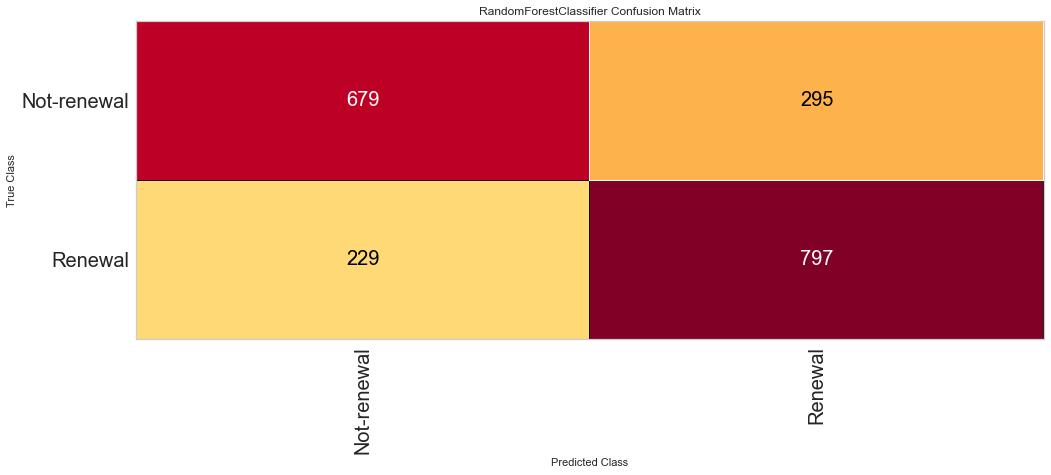

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classification model 
model = RandomForestClassifier()

#The ConfusionMatrix visualizer taxes a model
classes = ['Not-renewal','Renewal']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()



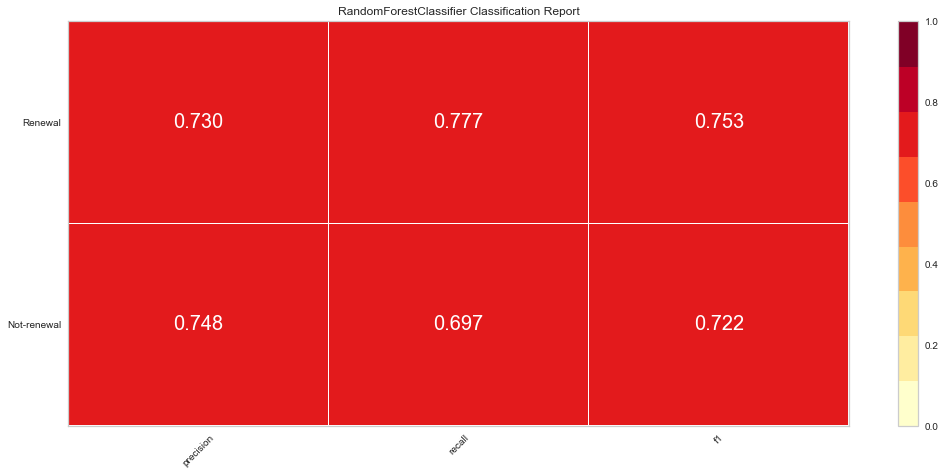

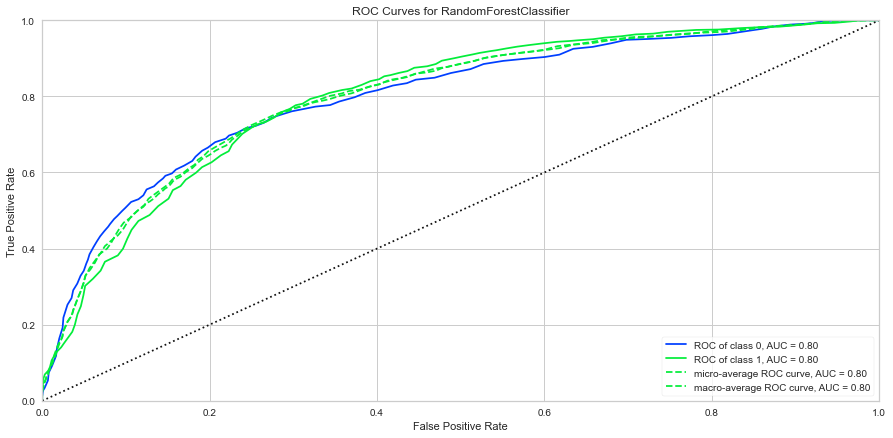

In [72]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


In [73]:
# Create predictions
predictions = model.predict(X_val)

In [74]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.738


In [75]:
# Random Forest hyperparameter tuning using RandomizedSearchCV
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [76]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [77]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [78]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(data_model_X, data_model_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                         120, 140, 160, 180,
                                                         200]},
                   random_state=42, verbose=2)

In [79]:
# Find the best parameters
rf_random.best_params_

{'n_estimators': 160,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [80]:
# Create Random Forest Classifier object using best parameters
model = RandomForestClassifier(n_estimators=160,
                                     min_samples_split=2,
                                     min_samples_leaf=4,
                                     max_features='sqrt',
                                     max_depth=10,
                                     bootstrap=True,
                                     random_state=42,
                                     n_jobs=-1)

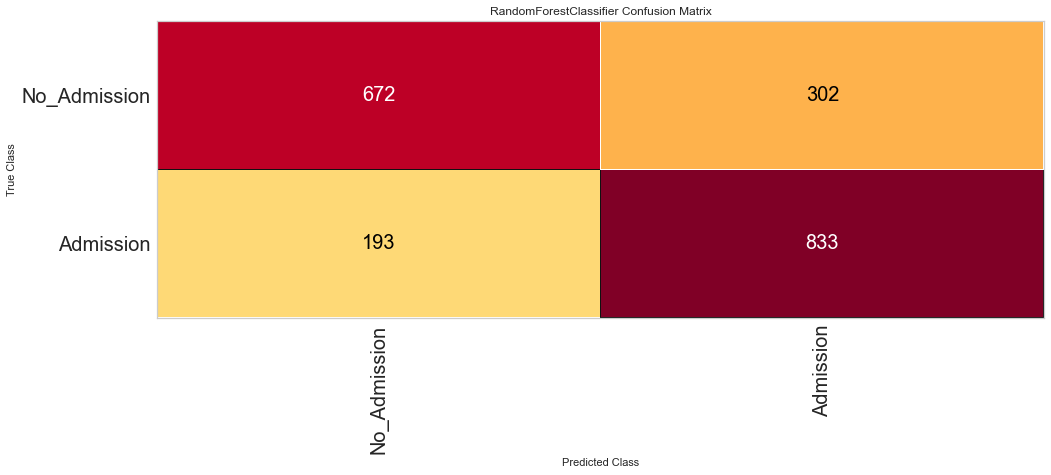

In [81]:
#The ConfusionMatrix visualizer taxes a model
classes = ['No_Admission','Admission']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
#How did we do?
cm.poof()

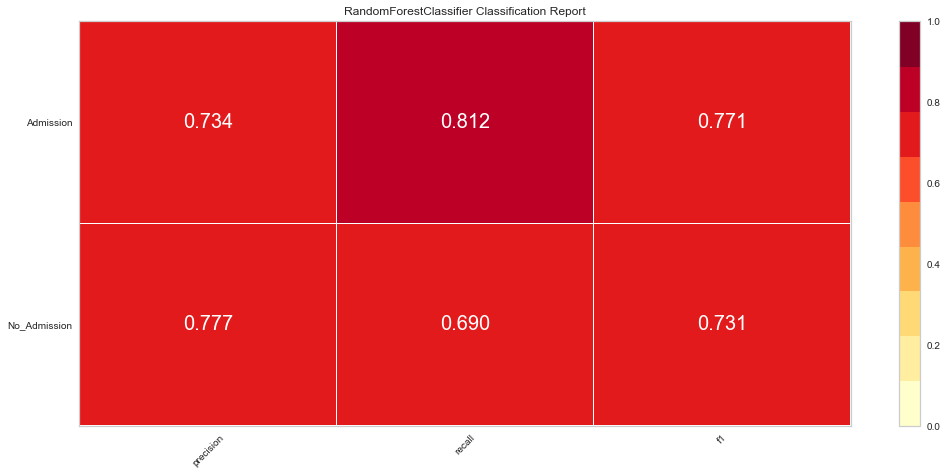

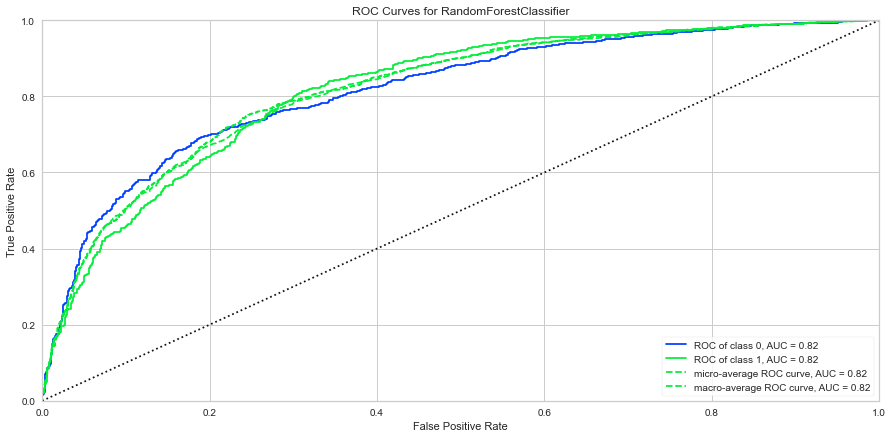

In [82]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()


In [83]:
# Create predictions
predictions = model.predict(X_val)

In [84]:
# Use score method to get accuracy of model
score = model.score(X_val, y_val)
print("Accuracy =", score)

Accuracy = 0.7525
